# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Jesus Enrique Bañales Lopez

- ID: A01642425

- My carreer: ITC


In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Tec/Github/T1002S/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing libraries

In [ ]:
!pip install scikit-learn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Dataset url
url = "datasets/A01642425_X.csv"


# PART 1
# Use your assigned dataset

## A1 Load data

In [ ]:

# Load the dataset
df = pd.read_csv(Ruta + url)
print(df)


     Unnamed: 0         x1         x2        x3         x4        x5  \
0             0  -1.051905  -7.999881 -9.467118  -0.900733 -3.840897   
1             1   5.902625 -14.084676  0.663125   2.733353 -5.648640   
2             2  -7.147726   5.619355  5.113652   8.213781  2.480953   
3             3  -8.345437   5.372187  4.406503   7.482344  4.190394   
4             4   0.704391  -6.933153 -9.745049  -1.041233 -8.220819   
..          ...        ...        ...       ...        ...       ...   
476         476   1.536243  -6.066398 -3.970566  -0.081445 -6.088958   
477         477   9.379051  -1.416246 -3.201503   6.187198 -7.999612   
478         478 -12.683785   6.103051  6.931862   8.489326  3.855403   
479         479  -8.850657   4.706808  7.715981  11.183193  1.881214   
480         480   2.570535 -10.889683  1.739691   1.696252 -5.678159   

            x6        x7         x8         x9       x10       x11       x12  \
0     8.080741  5.140159 -11.337278   8.276625 -7.52286

## A2 Data managment


Print the first 7 rows

In [ ]:
print(df.head(7))

   Unnamed: 0        x1         x2        x3        x4        x5         x6  \
0           0 -1.051905  -7.999881 -9.467118 -0.900733 -3.840897   8.080741   
1           1  5.902625 -14.084676  0.663125  2.733353 -5.648640  -5.647684   
2           2 -7.147726   5.619355  5.113652  8.213781  2.480953   3.085741   
3           3 -8.345437   5.372187  4.406503  7.482344  4.190394   4.321004   
4           4  0.704391  -6.933153 -9.745049 -1.041233 -8.220819  10.931214   
5           5 -9.625960   5.916161  7.538292  7.493733  1.748293   7.439330   
6           6  8.523270   3.489931 -6.549249  3.218658 -8.272021   3.856530   

         x7         x8        x9        x10        x11       x12        x13  \
0  5.140159 -11.337278  8.276625  -7.522866   4.469972 -9.079951  -7.128195   
1 -0.677785  -9.786956  3.927886   5.656088  -8.418144 -3.288064   5.657584   
2  6.069484   6.209231  3.458598  -6.122084  -8.072592 -3.878183 -10.553453   
3  4.059258   1.885037  6.260659  -7.114472  -8.117

Print the last 4 rows

In [ ]:
print(df.tail(4))

     Unnamed: 0         x1         x2        x3         x4        x5  \
477         477   9.379051  -1.416246 -3.201503   6.187198 -7.999612   
478         478 -12.683785   6.103051  6.931862   8.489326  3.855403   
479         479  -8.850657   4.706808  7.715981  11.183193  1.881214   
480         480   2.570535 -10.889683  1.739691   1.696252 -5.678159   

           x6        x7         x8         x9       x10       x11       x12  \
477  6.747810  3.048613  -9.179372 -12.013205  7.089893 -9.980314 -1.395680   
478  3.194536  3.936883   5.307070   7.217677 -5.881176 -4.580748  3.972979   
479  2.312730  5.515655  10.257229   3.668479 -6.477906 -7.155854 -5.021913   
480 -5.144861  2.040678 -10.200741   5.041139  2.869594 -9.337555 -2.216474   

           x13       x14  
477  -1.377889 -1.506052  
478 -11.269575  8.588262  
479  -8.919131  8.226655  
480   8.698844 -4.361505  


How many rows and columns are in your data?

Use the `shape` method


In [ ]:
df.shape

(481, 15)

Print the name of all columns

Use the `columns` method

In [ ]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [ ]:
df.dtypes


,0
Unnamed: 0,int64
x1,float64
x2,float64
x3,float64
x4,float64
x5,float64
x6,float64
x7,float64
x8,float64
x9,float64


What is the meaning of rows and columns?

In [ ]:
# Your responses here
#No puedo encontrar una logica al dataset, son numeros aparentemente sin sentido, sin nombres de columnas ademas de xN no se podria interpretar su significado

# 1) en renglon 0 muestra el primer renglon pues comienza a contar desde el 0

# 2) la columna 1 muestra la primera columna y asi sigue la sucesion (aunque esta la columna 0 que esta para contar los renglones)

# 3)

#...

Print a statistical summary of your columns


In [ ]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,240.000000,1.371571,-2.900871,-1.383922,3.832709,-3.896116,4.219898,3.953505,-5.358948,1.330692,-1.263872,-5.912239,-3.633784,-1.343722,1.359758
std,138.997002,6.886845,6.653108,5.391469,3.582576,4.487454,4.957284,3.445030,6.610707,5.787271,7.155478,5.069067,2.568621,6.923531,6.505626
min,0.000000,-13.270730,-15.097309,-10.509461,-6.393520,-13.445579,-7.428986,-5.257188,-14.973401,-13.574081,-13.792772,-14.261260,-9.845114,-12.786537,-12.938027
25%,120.000000,-3.635259,-8.742358,-5.886115,0.978562,-6.966462,0.836181,1.704813,-9.969806,-1.196202,-7.737919,-9.557391,-5.339030,-7.445579,-3.944822
50%,240.000000,2.875384,-3.860118,-2.031916,4.157024,-5.271456,5.769461,4.712753,-7.983568,3.435456,-1.707808,-7.576043,-3.598726,-2.984441,1.716211
75%,360.000000,6.596299,3.489931,2.915710,6.465878,-0.828886,8.031925,6.441302,-3.052379,5.338017,5.228020,-2.940931,-1.902262,4.954913,7.209730
max,480.000000,14.344313,12.351811,10.806518,12.759512,7.746923,13.362071,11.319182,10.454174,11.233955,12.838834,6.196792,4.005848,13.182102,13.309197


In [ ]:
# 1) What is the minumum and maximum values of each variable
#min: -13.270730	-15.097309	-10.509461	-6.393520	-13.445579	-7.428986	-5.257188	-14.973401	-13.574081	-13.792772	-14.261260	-9.845114	-12.786537	-12.938027
#max: 14.344313	12.351811	10.806518	12.759512	7.746923	13.362071	11.319182	10.454174	11.233955	12.838834	6.196792	4.005848	13.182102	13.309197

# 2) What is the mean and standar deviation of each variable
# mean: 1.371571	-2.900871	-1.383922	3.832709	-3.896116	4.219898	3.953505	-5.358948	1.330692	-1.263872	-5.912239	-3.633784	-1.343722	1.359758
# std: 6.886845	6.653108	5.391469	3.582576	4.487454	4.957284	3.445030	6.610707	5.787271	7.155478	5.069067	2.568621	6.923531	6.505626

# 3) What the 25%, 50% and 75% represent?
# Representan la sumatoria de cuartiles de la informacion distribuida a lo largo de la tabla
#25% = 1er cuartil, 50% = 2do cuartil y 75% 3er cuartil


Rename the columns using the same name with capital letters

In [ ]:
df = df.rename(columns={"x1": "X1","x2": "X2","x3": "X3","x4": "X4","x5": "X5","x6": "X6","x7": "X7","x8": "X8","x9": "X9","x10": "X10","x11": "X11","x12": "X12","x13": "X13","x14": "X14"})
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14'],
      dtype='object')

Rename the columns to their original names

In [ ]:
df = df.rename(columns={"X1": "x1","X2": "x2","X3": "x3","X4": "x4","X5": "x5","X6": "x6","X7": "x7","X8": "x8","X9": "x9","X10": "x10","X11": "x11","X12": "x12","X13": "x13","X14": "x14"})
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14'],
      dtype='object')

Use two different alternatives to get one of the columns

In [ ]:
print(df.x1)
print(df['x1'])

0      -1.051905
1       5.902625
2      -7.147726
3      -8.345437
4       0.704391
         ...    
476     1.536243
477     9.379051
478   -12.683785
479    -8.850657
480     2.570535
Name: x1, Length: 481, dtype: float64
0      -1.051905
1       5.902625
2      -7.147726
3      -8.345437
4       0.704391
         ...    
476     1.536243
477     9.379051
478   -12.683785
479    -8.850657
480     2.570535
Name: x1, Length: 481, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [ ]:
df1 = df.iloc[:, [2, 3]] #la primer columna no se toma en cuenta por que es solo el numero de renglones
print(df1.iloc[62:73])

           x2        x3
62   2.377237 -6.551703
63   6.274872  8.304510
64 -10.300247  1.846466
65 -10.356318  0.672925
66  -1.580835 -2.290673
67  -8.203534 -5.805834
68  -8.606252  1.711848
69  -5.720548 -8.279260
70   7.404649  5.424397
71  -6.909365 -6.910249
72 -12.935273  2.253267


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [ ]:
null = df1.isnull().sum()
print(null)
notnull = df1.notnull().sum()
print(notnull)
total = len(df1)
print(total)
#no hay espacios vacios y el total de llenos es de 481 (igual que el total de renglones), por lo que la suma de estos valores si dan el total de renglones

x2    0
x3    0
dtype: int64
x2    481
x3    481
dtype: int64
481


Discard the last column


In [ ]:
df = df.iloc[:, :-1]
df.columns


Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13'],
      dtype='object')

### Questions

Based on the previos results, provide a description of yout dataset

Your response: Es un dataset de 481 renglones y 14 renglones (el primero no cuenta) con valores que van del -15 al 15 respectivamente, con un promedio un poco mayor al 1 porciento en la mayoria de columnas. Lad columnas estan llamadas xN, sicesivamente y no se encontraron datos vacios.




## A3 Data visualization

Plot in the same figure the histogram of two variables



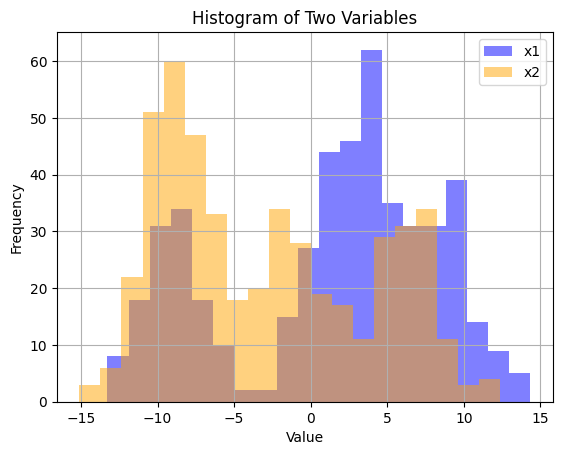

In [ ]:
plt.hist(df['x1'], bins=20, alpha=0.5, label='x1', color='blue')
plt.hist(df['x2'], bins=20, alpha=0.5, label='x2', color='orange')

plt.title('Histograma de 2 Variables')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Based on these plots, provide a description of your data:

Your response here:



Plot in the same figure the boxplot of two variables

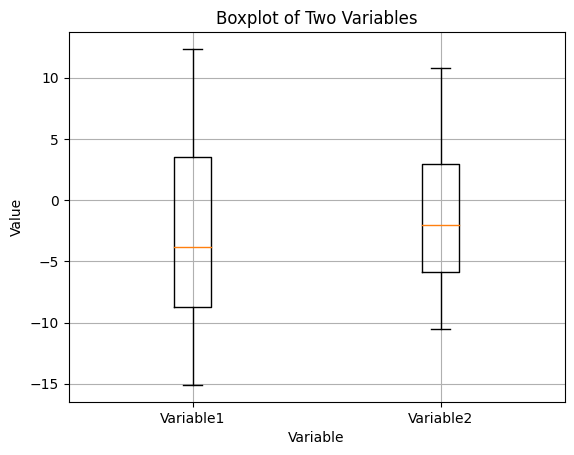

In [ ]:
plt.boxplot([df['x2'], df['x3']], labels=['Variable1', 'Variable2'])

plt.title('Boxplot of Two Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.grid(True)
plt.show()

Plot the scatter plot of two variables

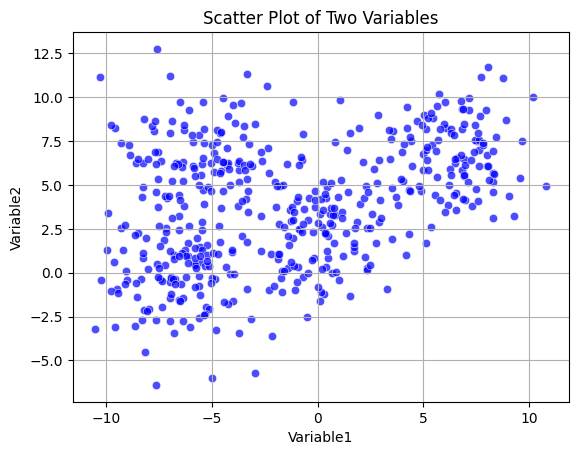

In [ ]:
sns.scatterplot(data=df, x='x3', y='x4', color='blue', alpha=0.7)

plt.title('Scatter Plot of Two Variables')
plt.xlabel('Variable1')
plt.ylabel('Variable2')
plt.grid(True)
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response: Los diferentes datos seleccionados demuestran que, pese a tener muchos valores en comun, estos pueden presentar ciertos valores elevados que los diferencian de gran manera




## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [ ]:
df = df.drop(columns=df.columns[0])

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Aplicar K-Means con 10 clústeres
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_

Add to your dataset a column with the estimated cluster to each data point

In [ ]:
# Crear un DataFrame para facilitar la visualización
df = pd.DataFrame(data_scaled, columns=[f'x{i}' for i in range(data_scaled.shape[1])])
df['Cluster'] = labels

# Agregar el número de fila (renglón) al DataFrame
df['Fila'] = df.index

# Seleccionar los primeros 10 registros
df_top10 = df.head(10)


Print the number associated to each cluster

In [ ]:
# Imprimir las primeras 10 filas del DataFrame
print("Primeras 10 filas del DataFrame con columnas específicas:")
print(df_top10[['x0', 'x1', 'x2', 'x3', 'Cluster']])

Primeras 10 filas del DataFrame con columnas específicas:
         x0        x1        x2        x3  Cluster
0  0.012318  0.779633  0.344813 -0.905282        0
1 -0.390945 -1.992594 -1.345739 -0.670521        1
2  1.422568 -0.229024  0.614852  1.751738        3
3  1.803902  0.020417  0.030729  1.096937        3
4 -0.964735  1.355239  0.297185 -0.731419        0
5  1.259129  0.650111 -0.848890  1.494151        3
6 -0.976157 -0.073376  0.517708 -0.643202        2
7 -0.725837  0.914798  0.342004 -0.649694        2
8 -0.390692 -1.330743 -2.305440 -0.601928        1
9 -0.693070 -1.355731 -2.381870 -0.698210        1


Print the centroids

In [76]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 7.80223932e-01  7.74925935e-01 -5.99972938e-01  8.53970475e-01
  -1.11015326e+00  1.56783337e+00 -8.78910773e-01 -6.60096855e-01
  -2.26057559e-01  5.40141752e-03 -1.34331864e+00  5.40141752e-03
  -1.34182794e+00  5.40141752e-03]
 [ 1.07445883e-01  2.69053540e-01  1.64684669e+00  4.46559690e-01
  -7.10302851e-01 -2.74652965e-01  8.57757113e-01 -1.08170933e+00
   1.04998995e-01  7.42994987e-02  4.44056923e-01  7.42994987e-02
   1.34368900e+00  7.42994987e-02]
 [ 6.42492373e-01  3.70910301e-01 -4.90441738e-01 -1.57698943e+00
   1.29411349e+00 -7.30653915e-01 -1.85779870e-01  3.12724835e-01
   2.37987525e-01 -1.56040951e-03 -4.49630859e-01 -1.56040951e-03
   4.48516690e-01 -1.56040951e-03]
 [-1.51751622e+00 -1.40319647e+00 -5.51833399e-01  2.74174481e-01
   5.21992681e-01 -5.57877513e-01  2.05223336e-01  1.41727076e+00
  -1.15962606e-01 -7.74947174e-02  1.33774470e+00 -7.74947174e-02
  -4.46655624e-01 -7.74947174e-02]]


Print the intertia metric

In [78]:
inertia = kmeans.inertia_
print(inertia)

2674.6739705542113


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

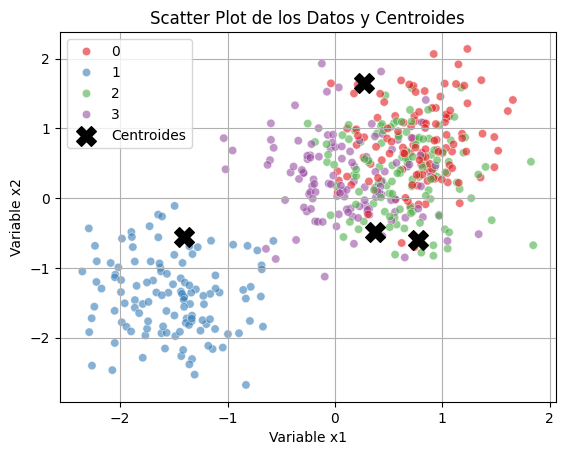

In [80]:
centroids_df = pd.DataFrame(centroids, columns=[f'x{i}' for i in range(data_scaled.shape[1])])
centroids_df = centroids_df[['x1', 'x2']]  # Seleccionar solo dos variables para la visualización

# Scatter plot de los datos con colores para cada clúster
sns.scatterplot(x='x1', y='x2', hue='Cluster', palette="Set1", data=df, legend='full', alpha=0.6)

# Plotear los centroides
plt.scatter(centroids_df['x1'], centroids_df['x2'], s=200, c='black', marker='X', label='Centroides')

plt.title('Scatter Plot de los Datos y Centroides')
plt.xlabel('Variable x1')
plt.ylabel('Variable x2')
plt.legend()
plt.grid(True)
plt.show()

### Questions

Provides a detailed description of your results

Your response: por la distribucion de los datos creo que el minimo de clusters para que esté bien catalogado (sin tener contexto de la informacion) deberia ser 4 y segun las necesidades ya se aumente.

## A5 Elbow plot

Compute the Elbow plot

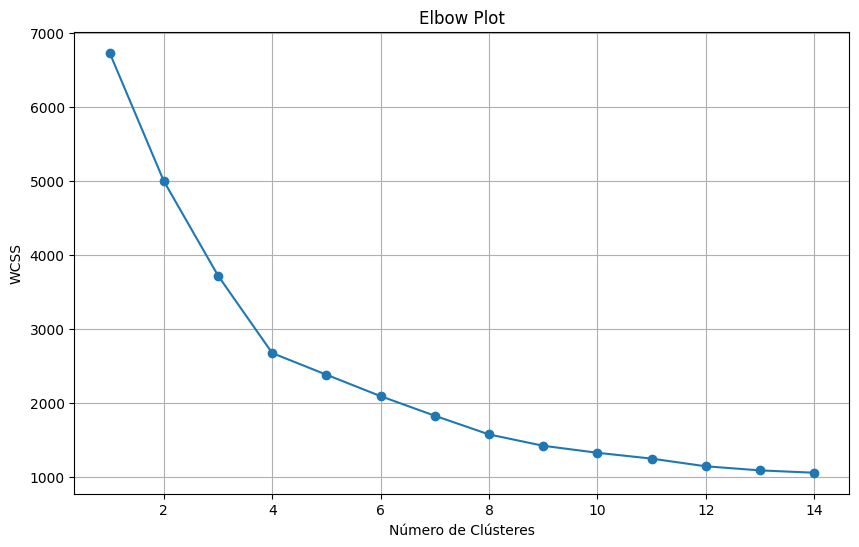

In [85]:
wcss = []
for n_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Crear el Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:14?


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: Bueno, es que mientras más clusters más se baja y a partir de un punto que no baja tanto ya funciona, pero sin informacion supongo que estaria bien entre el 4 y el 12.



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: Se me da bien, yo consideroque se me da bien la logica, sobre todo la interpretacion de datos y deducciones de ciertas interacciones. A si mismo soy capaz de deducir como conseguir cierta informacion y que datos pueden ser irrelevantes para ciertos propocitos

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:En esta actividad no pude explicar nada porque no hay nada que explicar, pero databases como iris las pude comprender muy bien, siendo mi unico problema la carga de dicha database pues la cargue de un lugar que le faltaba una columna y lo tuve que repetir.